### Relación entre el punto fijo la biseccion.

Inicial mente tenemos que el metodo bisección utiliza el teorema de bolzano, que dice:

Si f es continua en $[a,b]$ y $f(a)* f(b) <0$ entonces existe $c \in [a,b]$
tal que $f(c)= 0$

- $f(a) * f(b)<0 significa que tiene distinto signo.

Ahora bien, veamos esto en una grafica.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

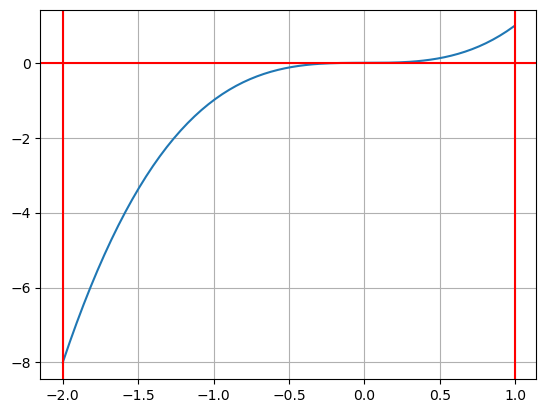

In [49]:
f = lambda x: x**3
xs = np.arange(-2,1, 0.023)
plt.plot(xs, f(xs))

plt.axhline(0, color ="r")
plt.axvline(-2, color = "r"); plt.axvline(1, color = "r")
plt.grid()

Aquí es claro, como es continua tiene que pasar por cero.

El algoritmo de bisección. Se va acarcar a la raíz, partiendo el intervalo
en la mitad: $\frac{a+b}{2}$ con la condición que tiene que tener un punto arriba y abajo de la raiz. Es decir, que $f(a)*f(b) < 0$.

Ya con esto, solo fataría un criterio de parada para el algoritmo. 

In [90]:
def bisection(f,a,b, tolerancia = 1e-5, iter = 10) -> tuple[int, int]:
    i = 0
    mitad_intervalo = (a+b)/2
    # Criterio de parada y particion de intervalo
    while i < iter:
        # Selección para acercarse por derecha o izquierda
        if f(a)*f(mitad_intervalo)< 0: b = mitad_intervalo 
        else: a = mitad_intervalo

        # Criterio de tolerancia 
        if abs(f(mitad_intervalo) - tolerancia) <0: return (i,mitad_intervalo)
        
        mitad_intervalo = (a+b)/2
        i +=1
    return (iter, mitad_intervalo)

In [88]:
i, ans = bisection(f, -2, 1)

print(f"La aproximación con {i} iteraciones es: {ans}")

La aproximación con 10 iteraciones es: -0.00048828125


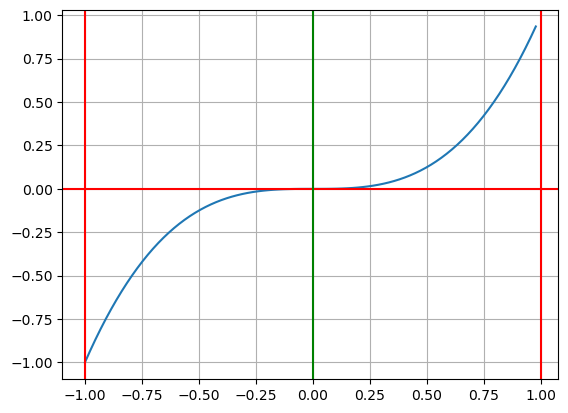

In [91]:
f = lambda x: x**3
xs = np.arange(-1,1, 0.023)
plt.plot(xs, f(xs))

plt.axhline(0, color ="r")
plt.axvline(-1, color = "r"); plt.axvline(1, color = "r")
plt.axvline(ans, color= "g")
plt.grid()

Veamos mas de cerca

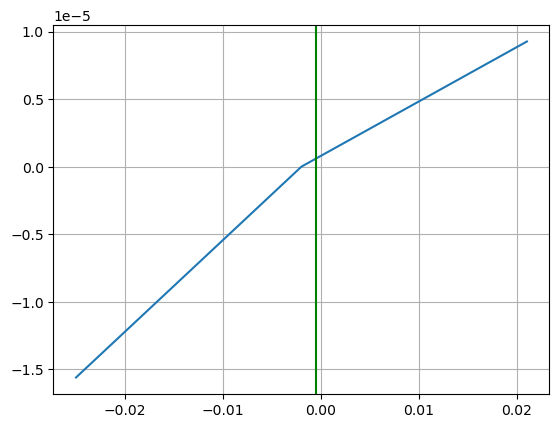

In [92]:
f = lambda x: x**3
xs = np.arange(-0.025,0.025, 0.023)
plt.plot(xs, f(xs))
plt.axvline(ans, color= "g")
plt.grid()

Veamos que tal es la aproximación con mas iteraciones

In [83]:
bisection(f, -2, 1, iter= 100000000)

La aproximación con 100000000 iteraciones es: 2.61012178719941e-54


## Preguntas

- ¿por qué con muchas iteraciones no cumple con la tolerancia? TODO: visualizar como son los números de maquina en python

### Veamos como esto se relaciona con el punto fijo

Sea una función continua en $[a,b]$ entonces f tiene al menos un punto fijo

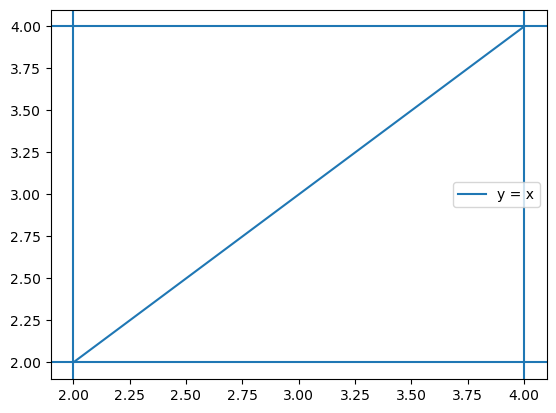

In [97]:
r = lambda x: x
xs = np.arange(2, 4.1, 0.2)
plt.plot(xs, r(xs), label = "y = x")
plt.legend()
plt.axvline(2)
plt.axvline(4)

plt.axhline(2)
plt.axhline(4)

Aquí podemos ver claramente, que si la función es continua en el intervalo $[2,4]$ entonces vamos a tener al menos un punto fijo.

#### Como es la prueba de esto:

Sea $f$ una funcion continua en el intervalo $[a,b]$ y sea $g(x) = x$
 la función identidad.

Ahora, definamos una nueva fución: $h(x) = f(x) - g(x)$ (esto parece una buena idea, porque podemos pensar en la distancia entre estos dos puntos. Así que cada vez será mas corta)

Vea que, $f(a) \not = a$ y $f(b) \not = b$ ya que, ya tendría un punto fijo.

Así $f(a)> a$ y $f(b)< b$ entonces  $h(a) = f(a) -g(a) > 0 $ y $h(b) = f(b) -g(b) < 0 $ Aquí, podemos utilizar el teorema de bolzano. Lo cual nos asegura que existe un 
$c$ en el intervalo tal que $h(c) = 0 = f(c) -g(c) -> f(c) = c$. Por lo tanto la función $f$ tiene al menos un punto fijo.

- La esencia de esto, es el teorema de bolzano, que obliga a la función pasar por la mitad.